## (31-B) Seaborn('17.09.13) : 줄여서 sns라고 많이 표현

In [43]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:

sns.set(style='white', color_codes = True)
iris = pd.read_csv('Iris.csv')
iris.head()

,ID,SepalLengthCm,SepalWidthCm,PetalL,PetalW,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


### <font color = white>Seaborn module 
1) jointplot()
***

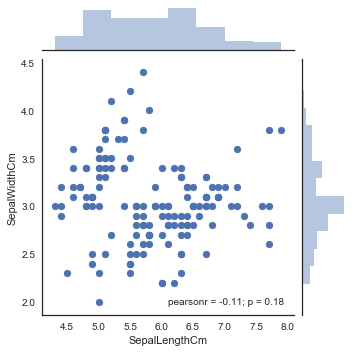

In [20]:
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data = iris, size = 5)

### <font color = white>Seaborn module 
2) FacetGrid : parameter 중에서 __hue__가 중요하다!<br>
: hue에 할당된 변수의 unique한 값들별 value값들을 본다.
***

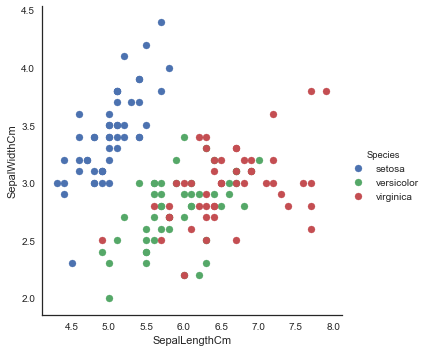

In [14]:
# plt.scatter는 여기서 처음하는 것임. 앞에서 plt에서도 안했음
sns.FacetGrid(iris, hue='Species', size=5).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()

### <font color = white>Seaborn module 
3) boxplot()
: boxplot()을 통해서 class별 univariate column의 대략적인 분포 확인 가능하다.
***

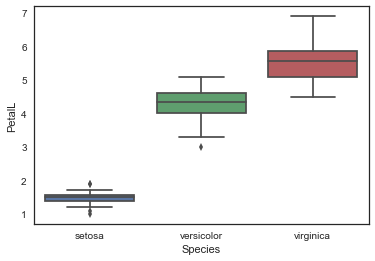

In [22]:
sns.boxplot(x='Species', y='PetalL', data = iris)

3_1) stripplot()
***

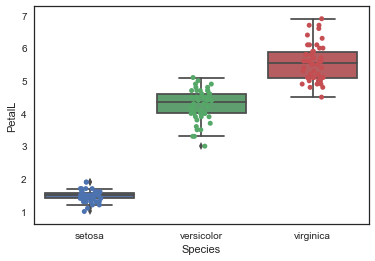

In [30]:
sns.boxplot(x='Species', y='PetalL', data = iris)
sns.stripplot(x='Species', y='PetalL', data = iris, jitter = True, edgecolor = 'blue')
# 질문! edgecolor은 어떤걸 말하는거지??

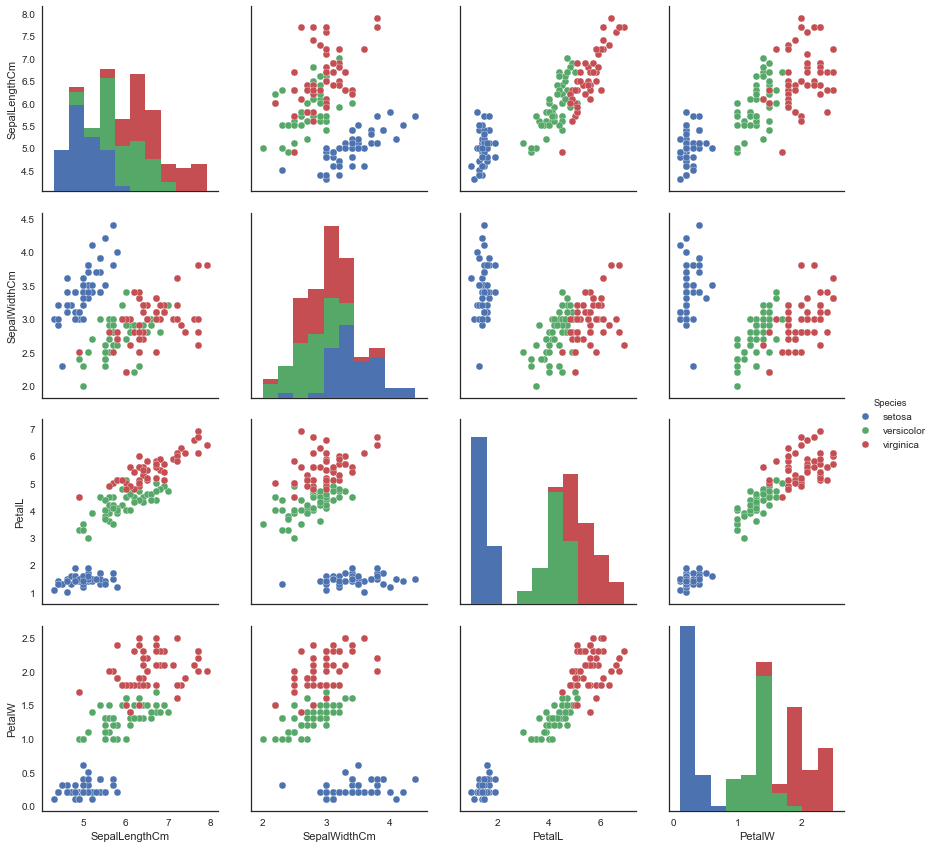

In [34]:
sns.pairplot(iris.drop('ID', axis=1), hue='Species', size = 3)

***
### Data Exploration Example(뉴욕 택시)

In [35]:
data_filename = 'nyc_data.csv'

In [37]:
data = pd.read_csv(data_filename, parse_dates=['pickup_datetime', 'dropoff_datetime'])
# 상위 3개의 record확인
data.head(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,C135A2D2BCFA21DD8EB98D904824F20B,2225537D65BE958CCAF93E43C8CCDE51,VTS,1,NaN,2013-01-15 20:09:00,2013-01-15 20:17:00,2,480,1.67,-74.001160,40.731796,-74.003639,50.216667
1,DE67EF0C69802DA616A6B6C812C1C364,FF965116CF16F832F2C7F940F16746E5,VTS,1,NaN,2013-01-15 18:24:00,2013-01-15 18:32:00,1,480,1.20,-73.966087,40.765057,-73.957939,49.316666
2,4B36B70B919494AF2C9F6F96F09A1F46,0EB798058527FC155EC17BB91EF92AFC,VTS,1,NaN,2013-01-16 19:25:00,2013-01-16 19:47:00,3,1320,3.83,-73.979324,40.766911,-73.986519,49.133331


In [38]:
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [41]:
# Pickup, dropoff 위도 & 경도 정보 새 변수에 할당
p_lat = data.pickup_latitude
p_lng = data.pickup_longitude

d_lat = data.dropoff_latitude
d_lng = data.dropoff_longitude


p_lng.head(4)

0   -74.001160
1   -73.966087
2   -73.979324
3   -73.973984
Name: pickup_longitude, dtype: float64

In [50]:
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0)/2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad-np.pi) / (2.0 * np.pi)
    return (x,y)

# px, py는 pickup에 대한 위도와 경도
px, py = lat_lng_to_pixels(p_lat, p_lng)
px

0         29.444122
1         29.453865
2         29.450188
3         29.451671
4         29.451408
5         29.450277
6         29.446104
7         29.446549
8         29.450228
9         29.506081
10        29.449446
11        29.455547
12        29.456454
13        29.457859
14        29.448670
15        29.443162
16        29.445828
17        29.451262
18        29.442177
19        29.447770
20        29.452595
21        29.450224
22        29.448274
23        29.450664
24        29.456715
25        29.445438
26        29.447931
27        29.448422
28        29.451262
29        29.452646
            ...    
854028    29.499558
854029    29.510759
854030    29.482937
854031    29.499516
854032    29.499942
854033    29.500071
854034    29.485450
854035    29.483371
854036    29.443270
854037    29.442408
854038    29.489835
854039    29.489121
854040    29.349179
854041    29.393050
854042    29.402553
854043    29.427333
854044    29.454303
854045    29.362354
854046    29.382318


### x 좌표에 대한 통계

In [51]:
px.count(), px.min(), px.max()

(854058, 28.77314888888889, 30.976852777777776)

In [52]:
px.mean(), px.median(), px.std()

(29.451623324138406, 29.44958583333333, 0.01085728154629855)

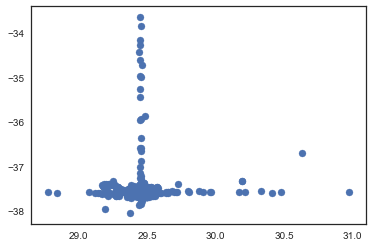

In [53]:
plt.scatter(px, py)

(-37.63, -37.54)

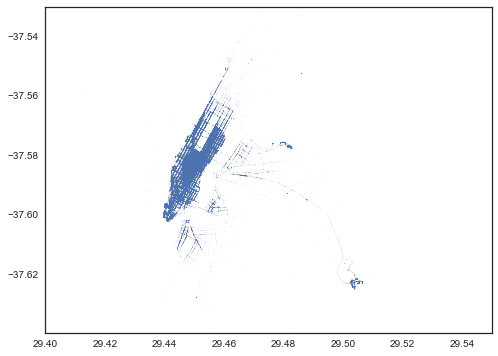

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(px, py, s=.1, alpha = .03)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)